In [1]:
import wandb, pdb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('dark')

In [2]:
api = wandb.Api(timeout=30)
runs = api.runs("structurelearning/structure-learning")
max_steps = 20000

In [6]:
def get_reqd_runs(exp_config):
    reqd_runs = []
    for run in runs:
        reqd_run = True
        for k,v in exp_config.items():
            if run.config[k] != v: 
                reqd_run = False
                break
        if reqd_run is False: continue
        
        reqd_runs.append(run)   # This is a required run

    print(f"Fetched {len(reqd_runs)} runs")
    assert len(reqd_runs) == 20
    return reqd_runs

def get_plotting_data(reqd_runs, reqd_keys):
    seed_data = {}
    for key in reqd_keys: seed_data[key] = []

    for run in reqd_runs:
        plotting_data = run.scan_history(reqd_keys, max_steps)
        for key in reqd_keys:
            seed_data[key].append([data[key] for data in plotting_data])
    
    for key in reqd_keys:
        seed_data[key] = [x for x in seed_data[key] if x]

    return seed_data

def plot_data(key, seed_data, ax, steps, label = None, color='blue', 
                marker='x', linestyle='-', markersize=10, subplot_title='Default title'):
    if label is None: label = ''
    x_axis = np.array(steps)
    y_axis_seeds = np.array(seed_data[key])
    
    yaxis = y_axis_seeds.mean(0)
    fill = y_axis_seeds.std(0)

    ax.plot(x_axis, yaxis, label=label, color=color, marker=marker, linestyle=linestyle, markersize=markersize)
    ax.fill_between(x_axis, yaxis - fill, yaxis + fill, alpha=0.3, color=color)
    ax.set_title(subplot_title)
    ax.grid()

In [31]:
def plot_metrics_for_nodes(reqd_keys, exp_config, nodes, exp_edges, title, x_steps, fname, 
                            exps_per_subplot, color_list, num_subplots, 
                            fig_dims=(5, 4), marker='x', linestyle='-', markersize=10, 
                            figsize=(10, 10), common_x_label='', common_y_label=''):
    
    idxs = []
    node_exp_edge_pair = []
    lines_labels = []
    h, w = fig_dims

    for i in range(h):
        for j in range(w):
            idxs.append((i, j))

    f, axes = plt.subplots(h, w, figsize = figsize, sharex=True)
    exp = exp_config['exp_name']
    reqd_runs = get_reqd_runs(exp_config)

    exp_config['num_nodes'] = nodes
    exp_config['exp_edges'] = exp_edges

    if exp == 'Decoder BCD observational learn L (linear projection)':
        label = 'Observational data'

    elif exp == 'Decoder BCD single interventional learn L (linear projection)':
        label = 'Random single node interventions'
        
    elif exp == 'Decoder BCD multi interventional learn L (linear projection)':
        label = 'Random multi node interventions'

    for i in range(num_subplots):
        if num_subplots == 1:   ax = axes
        elif h == 1 or w == 1:  ax = axes[i]
        else:                   ax = axes[idxs[i]]
            
        key = reqd_keys[i]
        if '/' in key: subplot_title = key.split('/')[-1]
        else: subplot_title = key

        plotting_data = get_plotting_data(reqd_runs, reqd_keys)        
            
        plot_data(  key, 
                    plotting_data, 
                    ax, 
                    x_steps, 
                    label=label,
                    color=color_list[0],
                    marker=marker,
                    linestyle=linestyle,
                    markersize=markersize,
                    subplot_title=subplot_title
                )

    lines_labels.append(ax.get_legend_handles_labels())
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    label_indices = list(np.arange(0, 2*(exps_per_subplot), 2))

    f.legend(lines[:exps_per_subplot], 
            labels[:exps_per_subplot], 
            loc='lower center', 
            ncol=exps_per_subplot, 
            bbox_to_anchor = [0.5,-0.1])

    f.suptitle(title)
    plt.tight_layout()
    f.savefig(fname, bbox_inches='tight', dpi=300)
    plt.show()
    print(f'Saved figure: {fname}')
    plt.close('all')

In [44]:
reqd_keys = [
    'Evaluations/SHD_C',
    'Evaluations/SHD', 
    'Evaluations/MCC', 
    'Evaluations/AUROC',
    'Evaluations/FPR',
    'Evaluations/FN',
    'Evaluations/TP',
    'Evaluations/AUPRC_G',
    'Evaluations/Precision',
    'Evaluations/TN',
    'Evaluations/FP',
    'Evaluations/TPR',
    'Evaluations/Recall',
    'Evaluations/AUPRC_W',
    'Evaluations/F1 Score',

    'L_MSE',
    'X_MSE',
    'true_obs_KL_term_Z',
]

In [40]:
d = 5
exp_edges = 1.0
fig_dims = (3, 3)
num_subplots = 9
num_steps = 5000
color_list = ['#ea4335'] # red/cinnabar

exp_config = {
    'exp_name': 'Decoder BCD multi interventional learn L (linear projection)',
    'num_nodes': d,
    'proj_dims': 100,
    'exp_edges': exp_edges,
    'num_steps': num_steps
}

steps = np.arange(0, num_steps+200, 200)


Fetched 20 runs


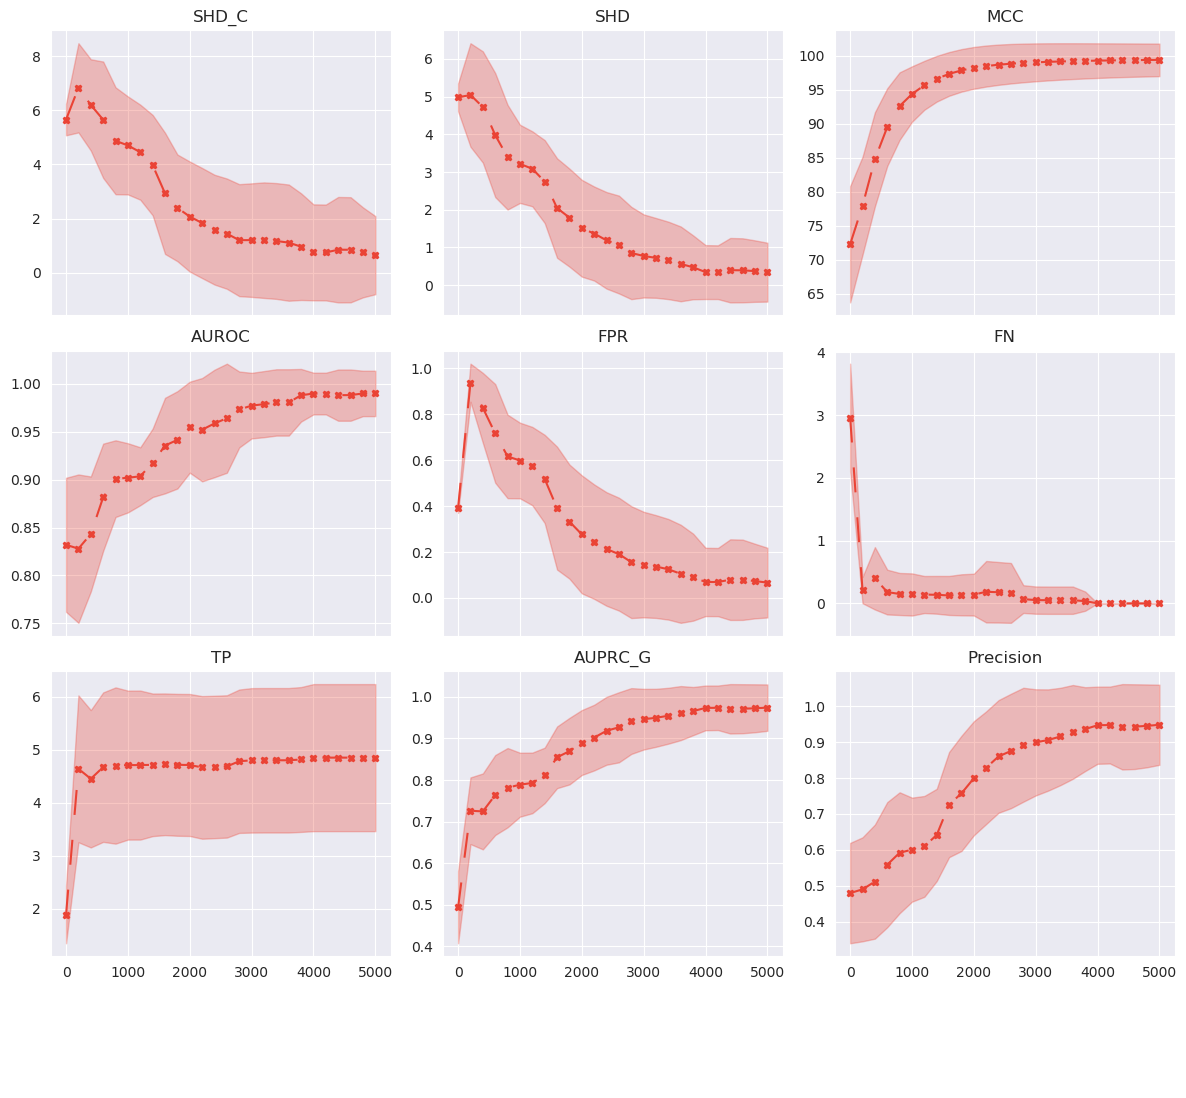

Saved figure: outputs/all_metrics/d5_ee1_linear_dbcd_all_metrics_pt1.pdf


In [41]:
fname = f'outputs/all_metrics/learn_L/d{d}_ee{int(exp_edges)}_linear_dbcd_all_metrics_pt1.pdf'

plot_metrics_for_nodes( reqd_keys[:9], 
                    exp_config, 
                    d, 
                    exp_edges, 
                    '', 
                    np.arange(0, exp_config['num_steps']+200, 200),
                    fname,
                    1,
                    color_list,
                    num_subplots,
                    fig_dims=fig_dims,
                    marker='X',
                    linestyle=(0, (12, 12)),
                    markersize=5,
                    figsize=(12, 10),
                    common_x_label='Iterations',
                    common_y_label='',
            )

Fetched 20 runs


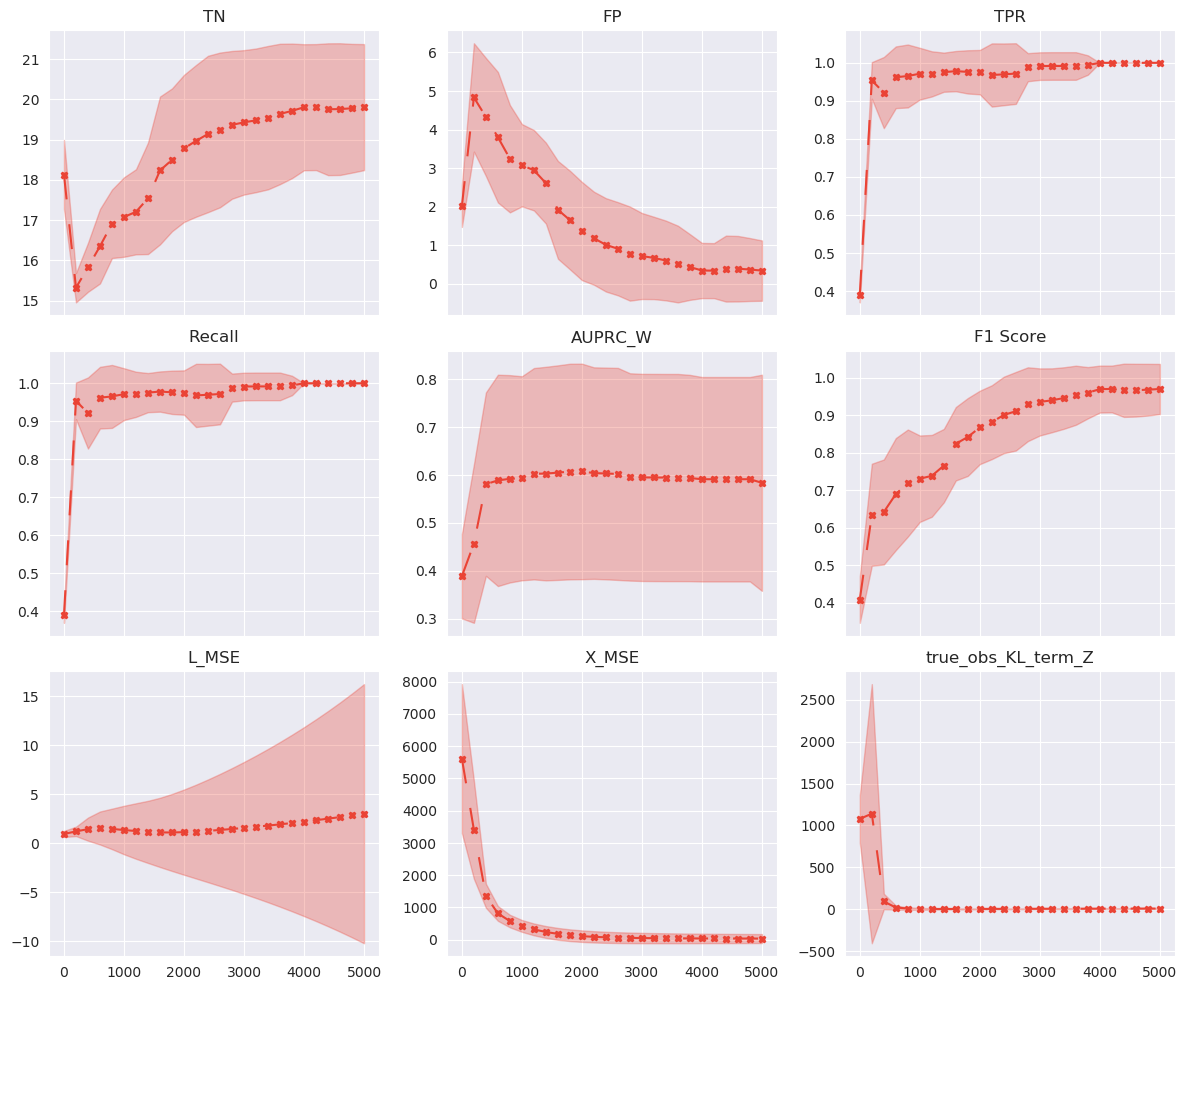

Saved figure: outputs/all_metrics/d5_ee1_linear_dbcd_all_metrics_pt2.pdf


In [45]:
fname = f'outputs/all_metrics/learn_L/d{d}_ee{int(exp_edges)}_linear_dbcd_all_metrics_pt2.pdf'

plot_metrics_for_nodes( reqd_keys[9:18], 
                    exp_config, 
                    d, 
                    exp_edges, 
                    '', 
                    np.arange(0, exp_config['num_steps']+200, 200),
                    fname,
                    1,
                    color_list,
                    num_subplots,
                    fig_dims=fig_dims,
                    marker='X',
                    linestyle=(0, (12, 12)),
                    markersize=5,
                    figsize=(12, 10),
                    common_x_label='Iterations',
                    common_y_label='',
            )